In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import csv


Linear Regression Functions:

In [2]:
def f(m, x, t):
    return m*x+t

def error(data:list, m, t):
    error = 0
    for x, y in data:
        error += math.pow(y - f(m, x, t), 2)
    error /= len(data)
    return error





Data generator:

In [3]:
#gen random data points
data = []
for i in range(100):
    x = random.uniform(0, 100)
    y = f(2, x, 3) + random.uniform(-10, 10)
    data.append((x, y))

Load Iris

In [4]:
class load_iris:
    def __init__(self, filename:str, p:int=20) -> None:
        with open(filename) as f: self.rows = list(csv.reader(f))
        for i in range(len(self.rows)): self.rows[i] = [float(x) for x in self.rows[i][:-1]] + [self.rows[i][-1]]
        random.shuffle(self.rows)
        self.trainigs_data = self.rows[:int(len(self.rows) * p/100)]
        self.test_data = self.rows[int(len(self.rows) * p/100):]
    def get_index(self, index:int, flower:str) -> list: return [zeile[index] for zeile in self.trainigs_data if zeile[-1] == flower]

iris = load_iris("iris_daten.csv", 100)
data = [(x, y) for x, y in zip(iris.get_index(2, "setosa"), iris.get_index(3, "setosa"))]

Visualize the data:

0.01022262


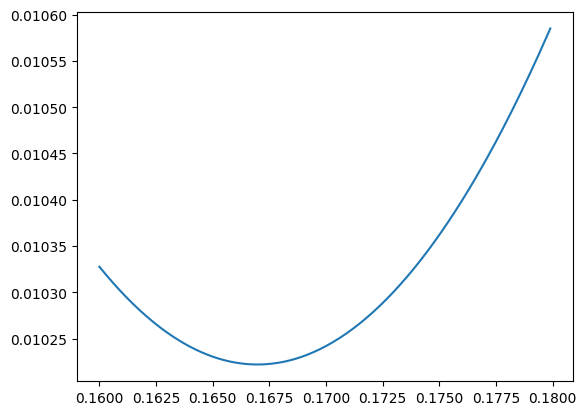

In [5]:
#plt.plot([x for x, y in data], [y for x, y in data], 'ro')
m = 0.1675
t = 0
print(error(data, m, t))
m_data = np.arange(0.16, 0.18, 0.0001)
plt.plot([m for m in m_data], [error(data, m, t) for m in m_data])
line_data = np.arange(min([x for x, y in data]), max([x for x, y in data]), 0.1)
#plt.plot(line_data, [f(m, x, t) for x in line_data])
plt.show()

12956.454184628825
35.25381619085602


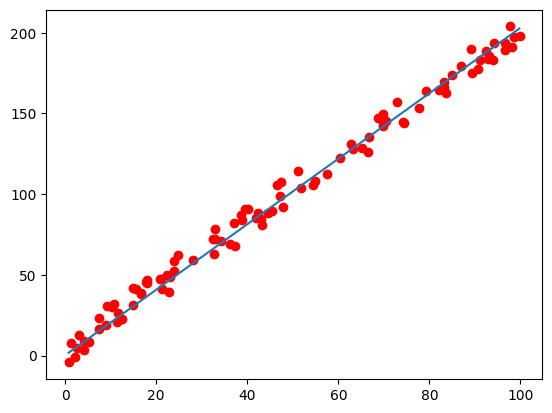

In [6]:
data = []
for i in range(100):
    x = random.uniform(0, 100)
    y = f(2, x, 3) + random.uniform(-10, 10)
    data.append((x, y))

L = 0.0001
E = 1000

m = 0
t = 0

print(error(data, m, t))
for i in range(E):
    Dm = (-2/len(data)) * sum([x * (y - (m*x+t)) for x, y in data])
    Dt = (-2/len(data)) * sum([y - f(m, x, t) for x, y in data])
    m -= L * Dm
    t -= L * Dt
print(error(data, m, t))

plt.plot([x for x, y in data], [y for x, y in data], 'ro')
line_data = np.arange(min([x for x, y in data]), max([x for x, y in data]), 0.1)
plt.plot(line_data, [f(m, x, t) for x in line_data])